#Programming Assignment 4: Divide and Conquer



## **4-1:** Binary search

In [ ]:
# Uses python3
import sys

def binary_search(a, x):
    left, right = 0, len(a)-1
    while (left<=right):
    	mid = (left+ right)//2
    	if(a[mid]==x):
    		return mid
    	elif(a[mid]<x):
    		left = mid+1
    	else:
    		right = mid	-1
    	pass
    return -1	
    # write your code here

def linear_search(a, x):
    for i in range(len(a)):
        if a[i] == x:
            return i
    return -1

if __name__ == '__main__':
    input = sys.stdin.read()
    data = list(map(int, input.split()))
    n = data[0]
    m = data[n + 1]
    a = data[1 : n + 1]
    for x in data[n + 2:]:
        # replace with the call to binary_search when implemented
        print(binary_search(a, x),end = ' ')

## **4-2:** Binary search with duplicates

In [ ]:
# Uses python3
def binary_search(key, query, low, high):
    if high < low:
      return -1
    mid = low + (high-low)//2
    if key == query[mid]:
      if mid-1 < 0:
        return mid
      if query[mid-1] != key:
        return mid
      return binary_search(key, query, low, mid-1)
    elif key < query[mid]:
      return binary_search(key, query, low, mid-1)
    else:
      return binary_search(key, query, mid+1, high)
    return -1

n = int(input())
a = list(map(int, input().split()))
k = int(input())
b = list(map(int, input().split()))

result = []

for x in b:
  result.append(binary_search(x, a, 0, len(a)-1))

print(*result)

## **4-3:** Majority Element

In [ ]:
# Uses python3
import sys

def get_majority_element(a, left, right):
    if left == right:
        return -1
    if left + 1 == right:
        return a[left]
    mid = (left+right)//2
    x = get_majority_element(a,left,mid)
    y = get_majority_element(a,mid,right)

    xcount = get_count(a, mid, right,x) + get_count(a, left,mid,x)
    ycount = get_count(a, left, mid,y)+ get_count(a, mid, right,y)
    if xcount>ycount and xcount > (right-left)//2:
        return x 
    elif ycount>xcount and ycount > (right-left)//2:
        return y
    if x==y :
        return x
    
    return -1
    
    

def get_count(a, left, right,x):
    count = 0
    for i in range(left,right):
        if(a[i]==x):
            count+=1
    return count    
if __name__ == '__main__':
    input = sys.stdin.read()
    n, *a = list(map(int, input.split()))
    if get_majority_element(a, 0, n) != -1:
        print(1)
    else:
        print(0)

## **4-4:** Improving QuickSort

In [ ]:
# Uses python3
import sys
import random

def partition3(a, l, r):
    #Divide and conquer
    x = a[l]
    m1 = l
    m2 = l
    for i in range(l + 1, r + 1):
    	if a[i] < x:
        	a[i],a[m1] = a[m1],a[i]
        	m1+=1
        	m2+=1
        	a[i],a[m2] = a[m2],a[i]
    	elif a[i] == x:
        	m2+=1
        	a[i],a[m2] = a[m2],a[i]
   # a[l],a[m1] = a[m1],a[l]
    return m1,m2    	    	






def partition2(a, l, r):
    x = a[l]
    j = l
    for i in range(l + 1, r + 1):
        if a[i] <= x:
            j += 1
            a[i], a[j] = a[j], a[i]
    a[l], a[j] = a[j], a[l]
    return j


def randomized_quick_sort(a, l, r):
    if l >= r:
        return
    k = random.randint(l, r)
    a[l], a[k] = a[k], a[l]
    #use partition3
    j,k = partition3(a, l, r)
    randomized_quick_sort(a, l, j-1);
    randomized_quick_sort(a, k+1, r);


if __name__ == '__main__':
    input = sys.stdin.read()
    n, *a = list(map(int, input.split()))
    randomized_quick_sort(a, 0, n - 1)
    for x in a:
        print(x, end=' ')

## **4-5:** Inversions

In [ ]:
# Uses python3
import sys

def get_number_of_inversions(a, b, left, right):
    number_of_inversions = 0
    if right - left <= 1:
        return number_of_inversions
    ave = (left + right) // 2
    number_of_inversions = get_number_of_inversions(a, b, left, ave)
    number_of_inversions += get_number_of_inversions(a, b, ave, right)
    number_of_inversions += merge(a,b,left,right)
    return number_of_inversions

def merge(a,b,left,right):
	mid = (left+right)//2

	#1st while loop runs as long as any subarray has
	#elements left and inversion occurs if a[i] > a[j]
	#no of inversions is mid - j
	inv_count = 0
	i=left
	j=mid
	k=left
	while i<mid and j<right:
		if a[i]<=a[j]:
			#no inversion
			b[k] = a[i]
			i+=1
			k+=1
		else : #inversion occurs
			inv_count+=mid-i
			b[k] = a[j]
			k+=1
			j+=1

	
	while i<mid :
		b[k] = a[i]
		i+=1
		k+=1
	while j<right :
		b[k] = a[j]
		k+=1
		j+=1

	for ind in range(left,right):
		a[ind] = b[ind]

	
	return inv_count	

if __name__ == '__main__':
    input = sys.stdin.read()
    n, *a = list(map(int, input.split()))
    b = n * [0]
    print(get_number_of_inversions(a, b, 0, len(a)))

## **4-6:** Organizing a lottery

In [ ]:
# Uses python3
import sys

def fast_count_segments(starts, ends, points):
    cnt = [0] * len(points)
    starts.sort()
    ends.sort()
    n = len(ends)
    for i in range(len(points)):
        l = b_search(starts,points[i]) 
        while l+1< len(starts) and starts[l+1]== points[i]   :
            l+=1
        if  l<len(starts) and starts[l] <= points[i]:
            l+=1    
        r1 =  b_search(ends,points[i])
        while ends[r1-1]== points[i] and r1>0:
            r1-=1
        r = n - r1  
        cnt[i] = l+r-n




    
    return cnt

def naive_count_segments(starts, ends, points):
    cnt = [0] * len(points)
    for i in range(len(points)):
        for j in range(len(starts)):
            if starts[j] <= points[i] <= ends[j]:
                cnt[i] += 1
    return cnt    

def b_search(a,x):
    low = 0
    high = len(a) -1
    while low<= high:
        mid = (low+high)//2
        if(a[mid] == x):
            return mid+1
        elif (a[mid]<x):
            low = mid+1
        else:
            high = mid-1        
    if x>a[mid]:
        return mid+1
    return mid  



if __name__ == '__main__':
    input = sys.stdin.read()
    data = list(map(int, input.split()))
    n = data[0]
    m = data[1]
    starts = data[2:2 * n + 2:2]
    ends   = data[3:2 * n + 2:2]
    points = data[2 * n + 2:]
    #use fast_count_segments
    cnt = fast_count_segments(starts, ends, points)
    for x in cnt:
       print(x, end=' ')

## **4-7:** Closest points


In [ ]:
#Uses python3
import sys
import math

def minimum_distance(pts):
	if len(pts)==2:
		return distance(pts[0],pts[1])
	elif len(pts) == 3:
		return min(distance(pts[0],pts[1]),distance(pts[2],pts[1]),distance(pts[0],pts[2]))
	if len(pts)<2:
		return 0	
	d1 = minimum_distance(pts[:len(pts)//2])
	d2 = minimum_distance(pts[len(pts)//2:])
	d = min(d1,d2)
	mid = (pts[len(pts)//2][0] + pts[len(pts)//2+1][0])/2
	s1 = [i for i in pts if abs(mid-i[0])<d]
	if len(s1)==0:
		return d
	s1.sort(key = lambda x: x[1])
	for i in range(len(s1)-1):
		j = 0
		while i+j+1<len(s1)  :
			if(j>5): break
			j+=1
			d = min(d,distance(s1[i],s1[i+j]) )
	return d	




def distance(pts1,pts2):
	return math.sqrt((pts1[0] - pts2[0])**2 + (pts1[1] - pts2[1])**2 )


if __name__ == '__main__':
    input = sys.stdin.read()
    data = list(map(int, input.split()))
    n = data[0]
    x = data[1::2]
    y = data[2::2]
    pts = list(zip(x,y))
    pts.sort(key = lambda x:x[0])
    print("{0:.9f}".format(minimum_distance(pts)))

# Screenshots

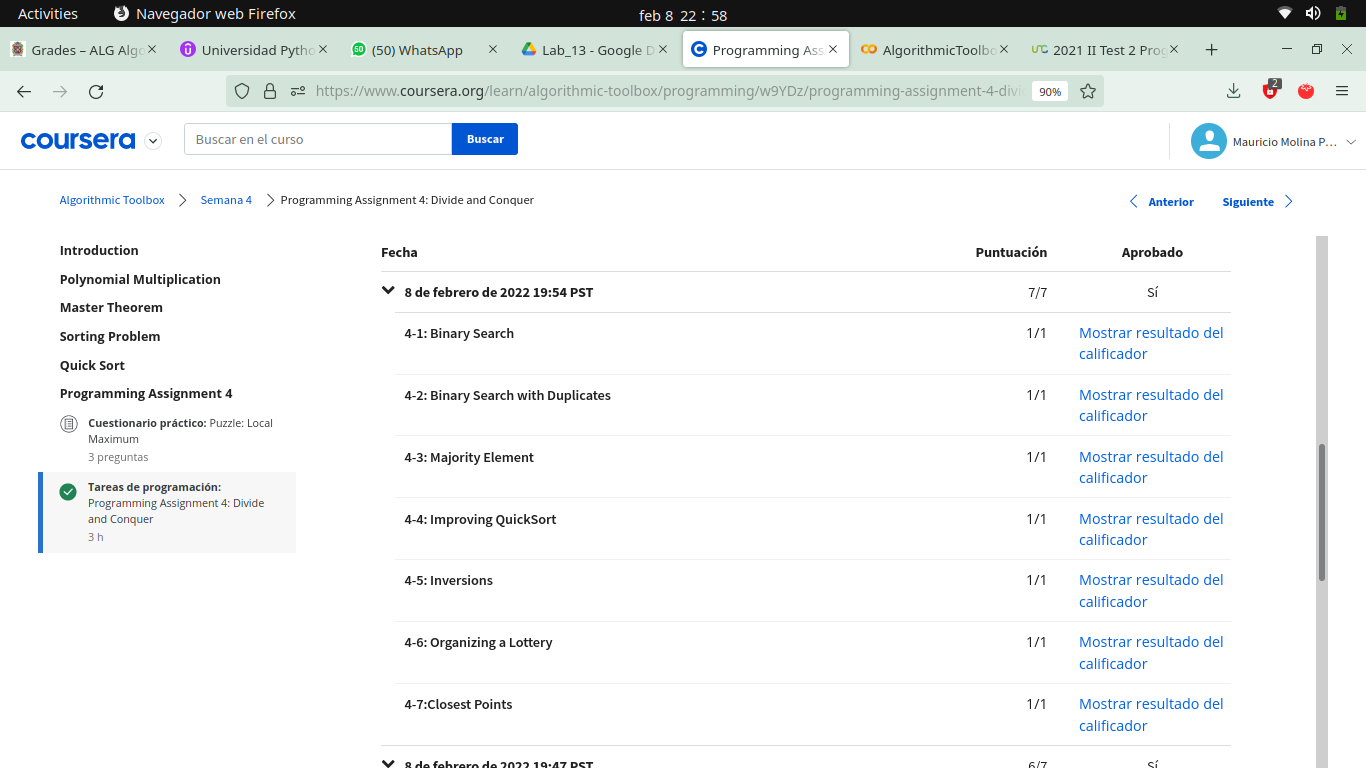


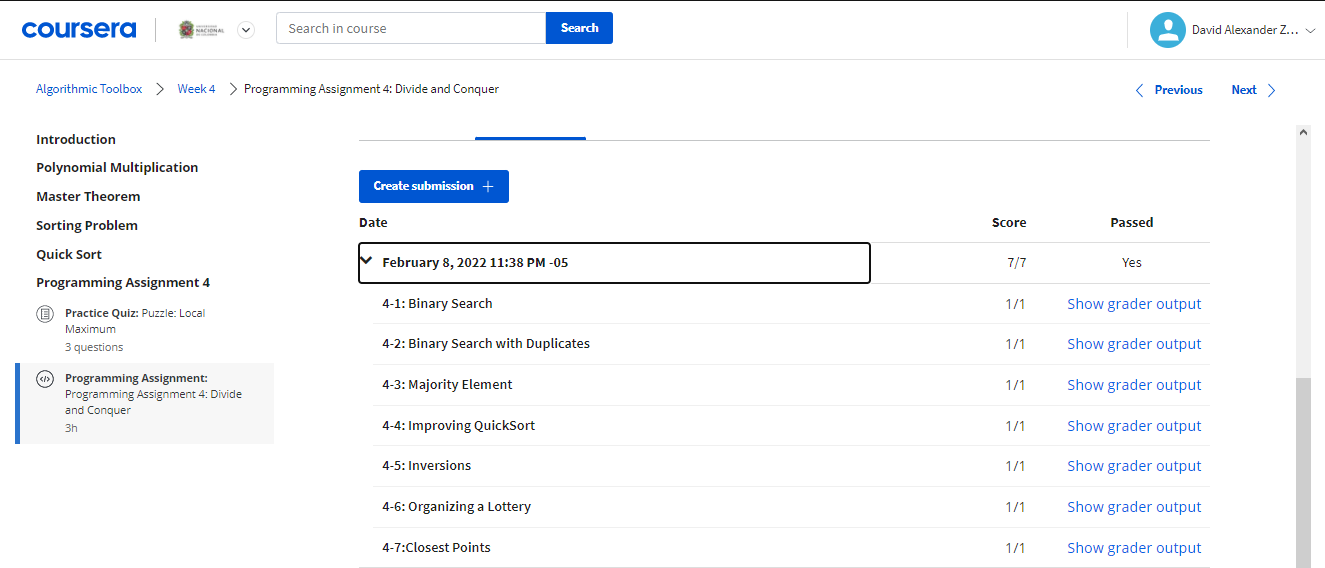

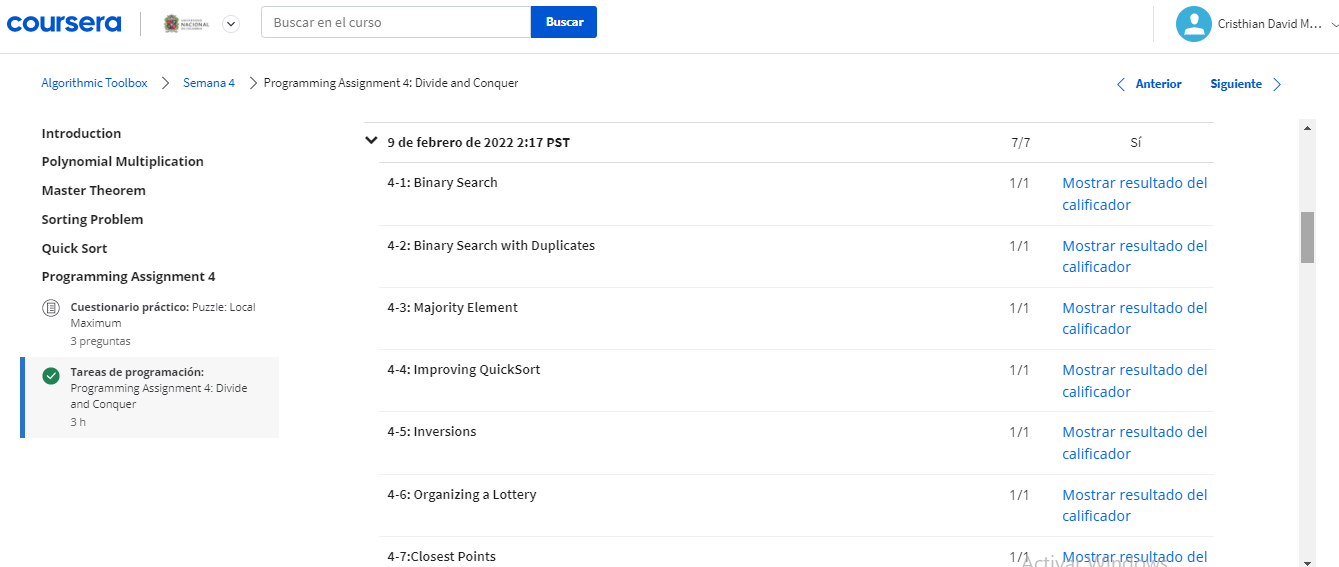